In [1]:
#!git clone https://github.com/NSCC-COGS/GDAA2030.git

Cloning into 'GDAA2030'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (132/132), done.
remote: Total 158 (delta 45), reused 65 (delta 13), pack-reused 0
Receiving objects: 100% (158/158), 12.57 MiB | 17.46 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [4]:
% pip install tifffile
%cd /content/GDAA2030/tutorial2/kevinkmcguigan


/content/GDAA2030/tutorial2/kevinkmcguigan
     |████████████████████████████████| 133kB 3.3MB/s 
     |████████████████████████████████| 18.1MB 1.2MB/s 


                                  productId  ...                                       download_url
0  LC08_L1TP_149039_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
1  LC08_L1TP_012001_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
2  LC08_L1TP_012002_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
3  LC08_L1TP_012010_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...
4  LC08_L1TP_012011_20170411_20170415_01_T1  ...  https://s3-us-west-2.amazonaws.com/landsat-pds...

[5 rows x 12 columns]
0         2017-04-11 05:36:29.349932
1         2017-04-11 15:14:40.001201
2         2017-04-11 15:15:03.871058
3         2017-04-11 15:18:14.918879
4         2017-04-11 15:18:38.780265
                     ...            
1939495   2020-04-20 08:09:51.590019
1939496   2020-04-20 08:10:15.519183
1939497   2020-04-20 08:10:39.452583
1939498   2020-04-20 08:11:03.385982
1939499

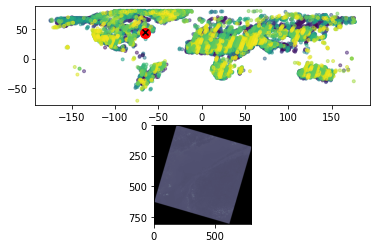

In [8]:
import GDAA2030_T2_kevinmc_getLandsat_functions as glf

''' for this code we will allow an input coordinate
and search for the closest, nearest landsat 8 scene 
for a given band based on a scene list
we will also filter by cloud cover percentage'''

lat = 44.88
lon = -65.16
band = 1
cloudCoverMax = 2
# sceneList = "scene_list.txt"
sceneList = 'https://landsat-pds.s3.amazonaws.com/c1/L8/scene_list.gz'
sceneTest = None # set a small number to test, or None
imageDir = r'.\images'

sceneDf = glf.loadSceneList(sceneList, sceneTest, cloudCoverMax)

# sceneDf = glf.loadSceneList(sceneList)

path,row = glf.findPathRow(sceneDf, lat, lon)

# print(path, row)

selectedScene = glf.selectScene(sceneDf, path, row)

print(selectedScene)

imageUrl, imagePath = glf.getImageIO(selectedScene, band, imageDir)

glf.downloadImage(imageUrl,imagePath)

glf.plotResults(lat,lon, selectedScene,sceneDf,imagePath)
